In [20]:
# Initial setup:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 1

#For fancy plots
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

# import libraries:
import sys, os
import os
import git
path_git = git.Repo('.', search_parent_directories=True).working_tree_dir
os.chdir(path_git); os.sys.path.append('./fr_mcmc/utils/')
from change_of_parameters import omega_CDM_to_luisa

sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'../..')))
#path_git = git.Repo('.', search_parent_directories=True).working_tree_dir


from getdist import plots
import getdist
from getdist import plots, MCSamples, loadMCSamples
getdist.chains.print_load_details = False
import scipy
import numpy as np

from matplotlib import pyplot as plt
from scipy.linalg import sqrtm

from seaborn import heatmap
import pandas as pd
import emcee

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:
discard=0
thin=1
root_dic = '/home/matias/Documents/Repos/GILA-output/paper/'

# Get the samples:
samples_lcdm = emcee.backends.HDFBackend(root_dic + 'sample_LCDM_PPS_CC_3params/sample_LCDM_PPS_CC_3params.h5')
samples_beta = emcee.backends.HDFBackend(root_dic + 'sample_BETA_PPS_CC_4params_long_prior/sample_BETA_PPS_CC_4params.h5')
samples_gila = emcee.backends.HDFBackend(root_dic + 'sample_GILA_PPS_CC_4params/sample_GILA_PPS_CC_4params.h5')

#nwalkers, ndim = reader_lcdm.shape #Number of walkers and parameters
flat_samples_beta = samples_beta.get_chain(discard=discard, flat=True, thin=thin)
flat_samples_gila = samples_gila.get_chain(discard=discard, flat=True, thin=thin)
flat_samples_lcdm = samples_lcdm.get_chain(discard=discard, flat=True, thin=thin)

omega_r = 2.47e-5 
L_bar = 0.90
names_LCDM = ['M_{{abs}}','H_0','\omega_m','\Omega_{{m}}^{{LCDM}}','\Omega_{{\\Lambda}}^{{LCDM}}']
labels_LCDM = names_LCDM
names_GILA = ['M_{{abs}}','\\beta','H_0','\omega_m','\Omega_{{m}}^{{GILA-\\beta}}','\Omega_{{m}}^{{LCDM}}','\Omega_{{\\Lambda}}^{{LCDM}}']
labels_GILA = names_GILA


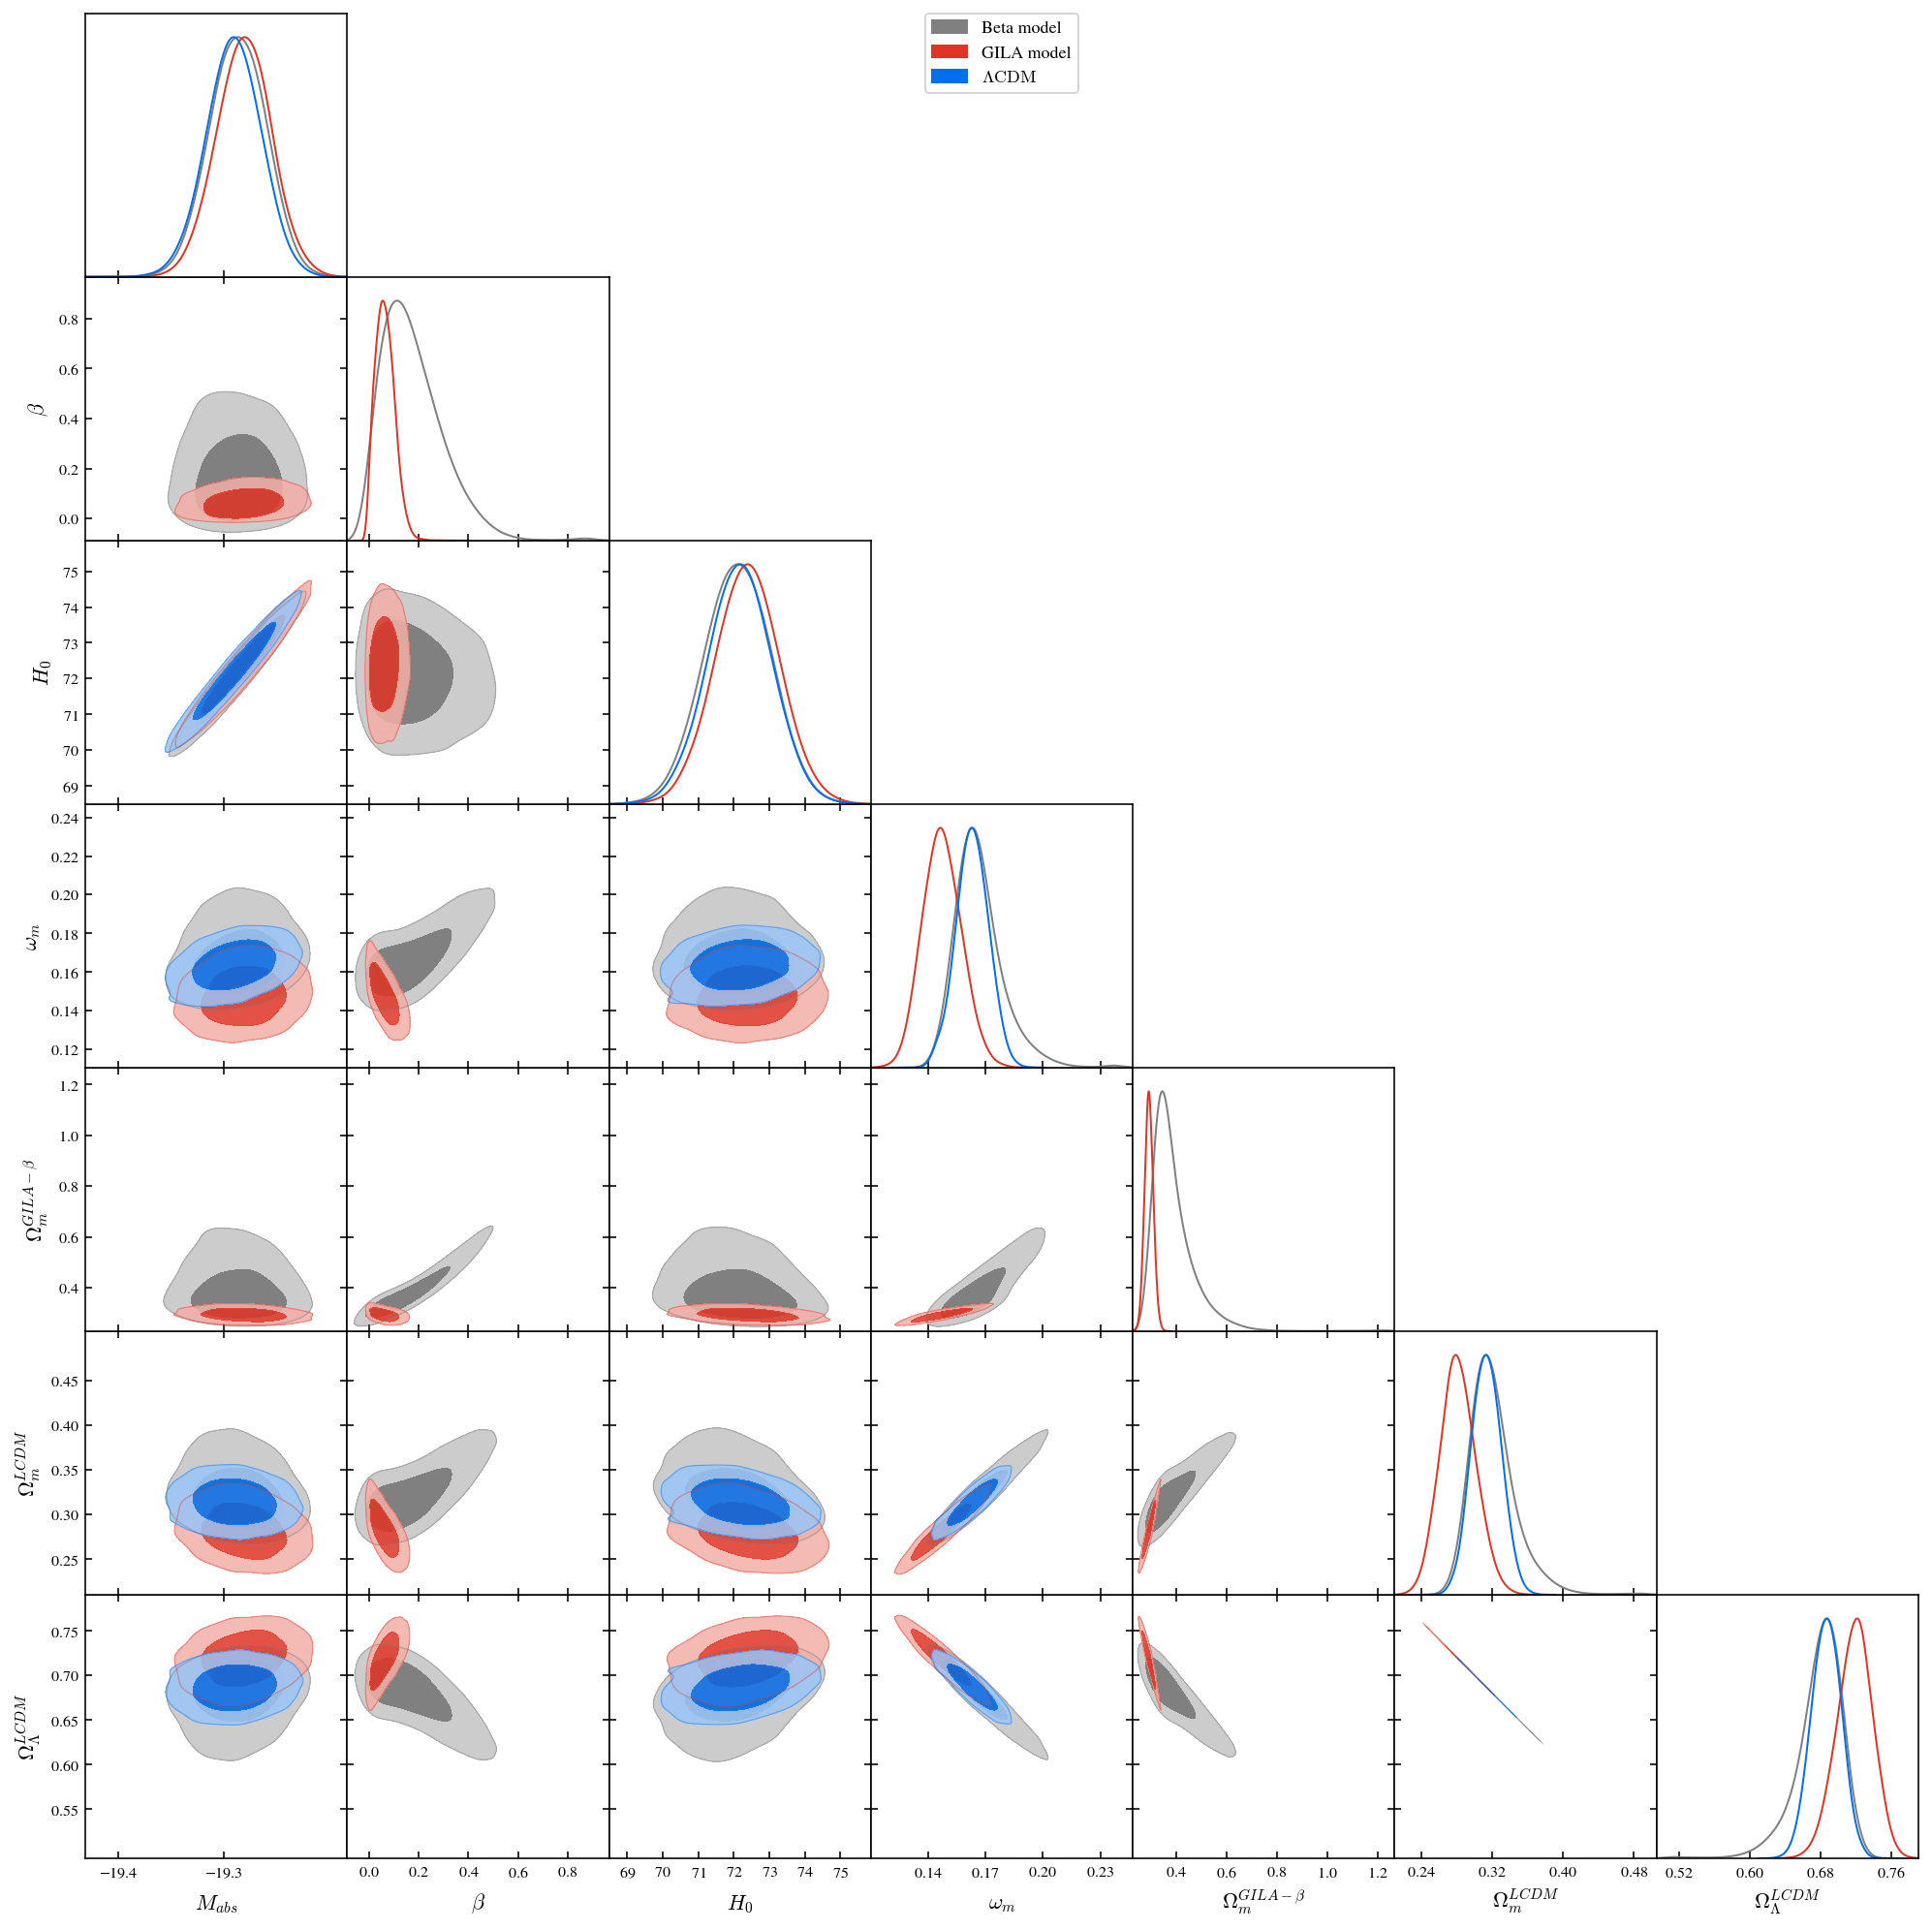

In [50]:
#LCDM MODEL
M_abs = flat_samples_lcdm[:,0]
H0 = flat_samples_lcdm[:,1]
omega_m = flat_samples_lcdm[:,2]

Omega_r_lcdm = omega_r / (H0/100)**2
Omega_m_lcdm = omega_m / (H0/100)**2
Omega_L_lcdm = 1 - Omega_m_lcdm - Omega_r_lcdm

chains_lcdm = np.zeros((len(M_abs),5))
chains_lcdm[:,0] = M_abs
chains_lcdm[:,1] = H0
chains_lcdm[:,2] = omega_m
chains_lcdm[:,3] = Omega_m_lcdm
chains_lcdm[:,4] = Omega_L_lcdm

#BETA MODEL
M_abs = flat_samples_beta[:,0]
beta = flat_samples_beta[:,1]
H0 = flat_samples_beta[:,2]
omega_m = flat_samples_beta[:,3]

Omega_r_lcdm = omega_r / (H0/100)**2
Omega_m_lcdm = omega_m / (H0/100)**2
Omega_m_gila = omega_CDM_to_luisa(beta, L_bar, H0, Omega_m_lcdm, model = 'BETA')
Omega_L_lcdm = 1 - Omega_m_lcdm - Omega_r_lcdm

chains_beta = np.zeros((len(M_abs),7))
chains_beta[:,0] = M_abs
chains_beta[:,1] = beta
chains_beta[:,2] = H0
chains_beta[:,3] = omega_m
chains_beta[:,4] = Omega_m_gila
chains_beta[:,5] = Omega_m_lcdm
chains_beta[:,6] = Omega_L_lcdm

#GILA MODEL
M_abs = flat_samples_gila[:,0]
beta = flat_samples_gila[:,1]
H0 = flat_samples_gila[:,2]
omega_m = flat_samples_gila[:,3]

Omega_r_lcdm = omega_r / (H0/100)**2
Omega_m_lcdm = omega_m / (H0/100)**2
Omega_m_gila = omega_CDM_to_luisa(beta, L_bar, H0, Omega_m_lcdm, model = 'GILA')
Omega_L_lcdm = 1 - Omega_m_lcdm - Omega_r_lcdm

chains_gila = np.zeros((len(M_abs),7))
chains_gila[:,0] = M_abs
chains_gila[:,1] = beta
chains_gila[:,2] = H0
chains_gila[:,3] = omega_m
chains_gila[:,4] = Omega_m_gila
chains_gila[:,5] = Omega_m_lcdm
chains_gila[:,6] = Omega_L_lcdm

samples1 = MCSamples(samples=chains_beta, names=names_GILA, labels=names_GILA)
samples1 = samples1.copy(label=r'Lowest-order with $0.3\sigma$ smoothing',
			settings={'mult_bias_correction_order':0,'smooth_scale_2D':0.3,
			'smooth_scale_1D':0.3})

samples2 = MCSamples(samples=chains_gila, names=names_GILA, labels=names_GILA)
samples2 = samples2.copy(label=r'Lowest-order with $0.3\sigma$ smoothing',
			settings={'mult_bias_correction_order':0,'smooth_scale_2D':0.3,
			'smooth_scale_1D':0.3})

samples3 = MCSamples(samples=chains_lcdm, names=names_LCDM, labels=names_LCDM)
samples3 = samples3.copy(label=r'Lowest-order with $0.3\sigma$ smoothing',
			settings={'mult_bias_correction_order':0,'smooth_scale_2D':0.3,
			'smooth_scale_1D':0.3})


g = plots.get_subplot_plotter()
g.triangle_plot([samples1, samples2, samples3],
				filled=True, params=names_GILA,
				#contour_colors=color,
				contour_lws=1,
				legend_labels=['Beta model','GILA model',r'$\Lambda \rm{{CDM}}$'])

g.export(root_dic + 'triangle_plot_beta_gila_lcdm.pdf')


In [43]:
def report_intervals(sampler, labels, discard=0, thin=1):
    if isinstance(sampler, np.ndarray)==True: #Posprocessed chains
        samples = sampler
        len_chain, ndim=samples.shape
    else:
        samples = sampler.get_chain(discard=discard, flat=True, thin=thin)
        len_chain, nwalkers, ndim = sampler.get_chain().shape

    #textfile_witness = open(save_path + '/intervals.dat','w')
    labels = labels
    for i in range(ndim):
        mean = np.mean(samples[:,i])
        one_s = 68
        two_s = 95

        one_sigma = az.hdi(samples,hdi_prob = one_s/100)[i]
        two_sigma = az.hdi(samples,hdi_prob = two_s/100)[i]

        q1 = np.diff([one_sigma[0],mean,one_sigma[1]])
        q2 = np.diff([two_sigma[0],mean,two_sigma[1]])

        if np.abs(one_sigma[0]) < 10**(-2): #Upper limit interval
            txt = "\mathrm{{{0}}} < {1:.3f}({2:.3f})"
            txt = txt.format(labels[i], mean + q1[1], mean + q2[1])

        else:
            txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}({4:.3f})}}^{{+{2:.3f}({5:.3f})}}"
            txt = txt.format(mean, q1[0], q1[1], labels[i], q2[0], q2[1])
        #textfile_witness.write('{} \n'.format(txt))
        print(txt)

In [46]:
from IPython.display import display, Math
import arviz as az
from scipy.stats import scoreatpercentile
from getdist import plots, MCSamples

#BETA intervals
print('Beta model intervals:')
report_intervals(chains_beta, names_GILA)
print('\n')

#GILA intervals
print('GILA model intervals:')
report_intervals(chains_gila, names_GILA)
print('\n')

#LCDM intervals
print('LCDM model intervals:')
report_intervals(chains_lcdm, names_LCDM)


Beta model intervals:


/home/matias/anaconda3/envs/fR-MCMC/lib/python3.7/site-packages/arviz/stats/stats.py:487: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  FutureWarning,


\mathrm{M_{{abs}}} = -19.286_{-0.025(0.050)}^{+0.027(0.050)}
\mathrm{\beta} = 0.177_{-0.161(0.177)}^{+0.053(0.225)}
\mathrm{H_0} = 72.107_{-0.898(1.783)}^{+0.927(1.778)}
\mathrm{\omega_m} = 0.167_{-0.014(0.022)}^{+0.007(0.026)}
\mathrm{\Omega_{{m}}^{{GILA-\beta}}} = 0.391_{-0.086(0.105)}^{+0.020(0.164)}
\mathrm{\Omega_{{m}}^{{LCDM}}} = 0.321_{-0.028(0.044)}^{+0.014(0.053)}
\mathrm{\Omega_{{\Lambda}}^{{LCDM}}} = 0.679_{-0.014(0.053)}^{+0.028(0.044)}


GILA model intervals:
\mathrm{M_{{abs}}} = -19.281_{-0.025(0.050)}^{+0.025(0.050)}
\mathrm{\beta} = 0.065_{-0.042(0.065)}^{+0.034(0.066)}
\mathrm{H_0} = 72.379_{-0.860(1.775)}^{+0.895(1.715)}
\mathrm{\omega_m} = 0.147_{-0.011(0.018)}^{+0.009(0.020)}
\mathrm{\Omega_{{m}}^{{GILA-\beta}}} = 0.294_{-0.016(0.032)}^{+0.017(0.033)}
\mathrm{\Omega_{{m}}^{{LCDM}}} = 0.282_{-0.021(0.037)}^{+0.018(0.040)}
\mathrm{\Omega_{{\Lambda}}^{{LCDM}}} = 0.718_{-0.018(0.040)}^{+0.021(0.037)}


LCDM model intervals:
\mathrm{M_{{abs}}} = -19.290_{-0.025(0.051)}^{